In [1]:
pip install DataPrep

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

## DATA PREPARATION

In [6]:
#before reading the files, setup the working directory to point to project repo
#reading data files 


test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'


In [7]:
train_news = pd.read_csv("C://Users//DHANUSHA//Desktop//Fake_News_Detection-master//train.csv")
train_news

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
...,...,...
10235,There are a larger number of shark attacks in ...,True
10236,Democrats have now become the party of the [At...,True
10237,Says an alternative to Social Security that op...,True
10238,On lifting the U.S. Cuban embargo and allowing...,False


In [8]:
test_news = pd.read_csv("C://Users//DHANUSHA//Desktop//Fake_News_Detection-master//test.csv")
test_news

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False
...,...,...
2546,"For the first time in more than a decade, impo...",True
2547,Says Donald Trump has bankrupted his companies...,True
2548,"John McCain and George Bush have ""absolutely n...",True
2549,A new poll shows 62 percent support the presid...,False


In [9]:
valid_news = pd.read_csv("C://Users//DHANUSHA//Desktop//Fake_News_Detection-master//valid.csv")
valid_news

,Statement,Label
0,We have less Americans working now than in the...,FALSE
1,"When Obama was sworn into office, he DID NOT u...",FALSE
2,Says Having organizations parading as being so...,FALSE
3,Says nearly half of Oregons children are poor.,TRUE
4,On attacks by Republicans that various program...,TRUE
...,...,...
2566,Says Donald Trump has bankrupted his companies...,TRUE
2567,"John McCain and George Bush have ""absolutely n...",TRUE
2568,A new poll shows 62 percent support the presid...,FALSE
2569,No one claims the report vindicating New Jerse...,FALSE


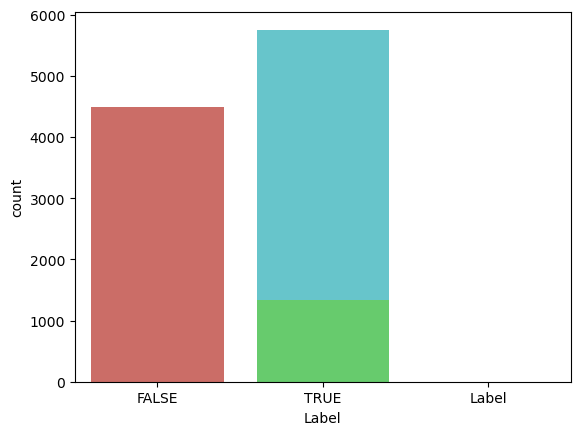

In [10]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))

#check the data by calling below function
#data_obs()

#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='Label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)


#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()

#Stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

## FEATURE SELECTION

In [11]:
pip install DataPrep

Note: you may need to restart the kernel to use updated packages.


In [12]:
news=train_news.copy()
news.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [13]:
news.reset_index(inplace=True)
news.head(5)

,index,Statement,Label
0,0,Says the Annies List political group supports ...,False
1,1,When did the decline of coal start? It started...,True
2,2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,3,Health care reform legislation is likely to ma...,False
4,4,The economic turnaround started at the end of ...,True


In [14]:
news.drop(['index'],axis=1,inplace=True)

In [15]:
news.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [16]:
data = news['Statement'][0]
data

'Says the Annies List political group supports third-trimester abortions on demand.'

In [17]:
import re

In [18]:
# accepting a-z , A-Z any other thing replace with space # you can see we dont have any special character in data
re.sub('[^a-zA-z]',' ',data)

'Says the Annies List political group supports third trimester abortions on demand '

In [19]:
# lowering is important to find similar words in different sentences
data = data.lower()
data

'says the annies list political group supports third-trimester abortions on demand.'

In [20]:
list=data.split()
list

['says',
 'the',
 'annies',
 'list',
 'political',
 'group',
 'supports',
 'third-trimester',
 'abortions',
 'on',
 'demand.']

In [21]:
# installing natural language toolkit
! pip install nltk

In [22]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHANUSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
ps = PorterStemmer()

In [90]:
# method 1
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['depart',
 'veteran',
 'affair',
 'manual',
 'tell',
 'veteran',
 'stuff',
 'like',
 'realli',
 'valu',
 'commun',
 'know',
 'encourag',
 'commit',
 'suicid']

In [89]:
# method 2
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['depart',
 'veteran',
 'affair',
 'manual',
 'tell',
 'veteran',
 'stuff',
 'like',
 'realli',
 'valu',
 'commun',
 'know',
 'encourag',
 'commit',
 'suicid']

In [92]:
# the text data that has to be passed with NLP
' '.join(review)

'depart veteran affair manual tell veteran stuff like realli valu commun know encourag commit suicid'

In [97]:
corpus=[]
sentences=[]
for i in range(0,len(news)):
    review=re.sub('[^a-zA-Z]',' ', news['Statement'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [94]:
corpus[0]

'say anni list polit group support third trimest abort demand'

In [95]:
corpus

['say anni list polit group support third trimest abort demand',
 'declin coal start start natur ga took start begin presid georg w bush administr',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'econom turnaround start end term',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad',
 'jim dunnam live district repres year',
 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg',
 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif',
 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost',
 'first time histori share nation popular vote margin smaller latino vote margin',
 'sinc nearli million american slip middl class poverti',
 'mitt romney governor massachusett didnt slow rate growth govern actual cut',
 'economi ble

In [96]:
len(corpus)

10240

## BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# i need top 5000 features from this entire vector
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
X=cv.fit_transform(corpus).toarray()

In [101]:
X.shape

(10240, 5000)

In [102]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [103]:
cv=CountVectorizer()

In [104]:
X = cv.fit_transform(corpus)

In [105]:
feature_names = cv.get_feature_names_out()

In [106]:
print(feature_names[:25])

['aa' 'aaa' 'aaron' 'aarp' 'aba' 'abandon' 'abba' 'abbott' 'abc' 'abdul'
 'abedin' 'abel' 'abid' 'abil' 'abillion' 'abject' 'abl' 'aboard'
 'abolish' 'abolit' 'abort' 'abortioneven' 'abortionist' 'abraham'
 'abrahamlincoln']


In [107]:
news.columns

Index(['Statement', 'Label'], dtype='object')

In [108]:
y=news['Label']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
X_test.shape

(2560, 7677)

In [112]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [113]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [114]:
predict = classifier.predict(X_test)
predict

array([ True,  True, False, ..., False, False,  True])

In [115]:
from sklearn import metrics

metrics.accuracy_score(y_test,predict)

0.607421875

In [116]:
cm = metrics.confusion_matrix(y_test,predict)
cm

array([[557, 559],
       [446, 998]], dtype=int64)

([<matplotlib.axis.YTick at 0x26fdbd47d30>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

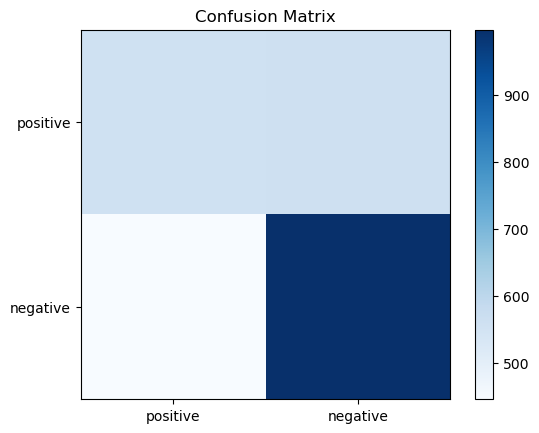

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [118]:
def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

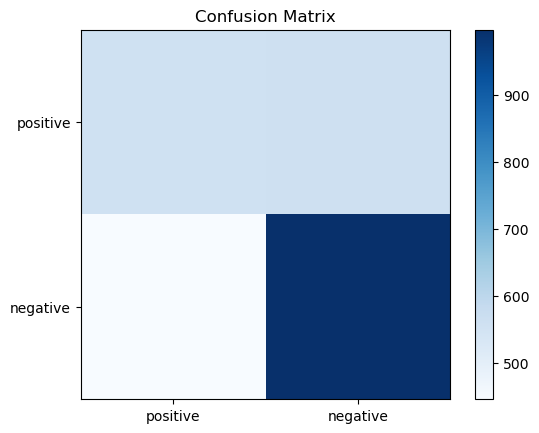

In [119]:
plot_confusion_matrix(cm)

In [120]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [121]:
linear_clf=PassiveAggressiveClassifier()

In [122]:
linear_clf=PassiveAggressiveClassifier()

In [123]:
linear_clf

PassiveAggressiveClassifier()

In [124]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
# Assuming you have your data loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an instance of PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
# Train the classifier
linear_clf.fit(X_train, y_train)
# Make predictions
predictions = linear_clf.predict(X_test)

In [125]:
predictions=linear_clf.predict(X_test)

In [126]:
metrics.accuracy_score(y_test,predictions)

0.54736328125

In [127]:
cm2=metrics.confusion_matrix(y_test,predictions)
cm2

array([[472, 416],
       [511, 649]], dtype=int64)

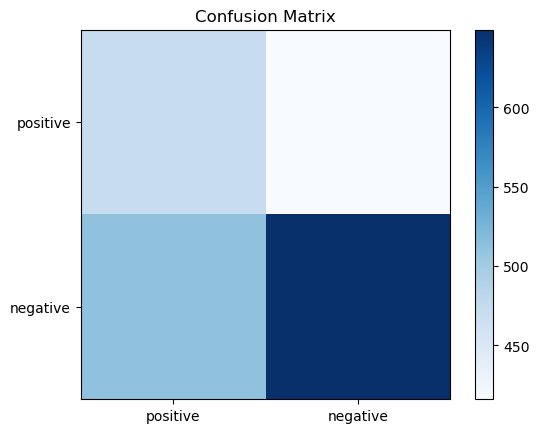

In [128]:
plot_confusion_matrix(cm2)

In [131]:
feature_names

array(['aa', 'aaa', 'aaron', ..., 'zone', 'zoo', 'zuckerberg'],
      dtype=object)

In [135]:
from sklearn.naive_bayes import MultinomialNB

In [136]:
feature_log_probabilities = classifier.feature_log_prob_

In [144]:
top_features_indices = feature_log_probabilities[0].argsort()[::-1][:20]

In [145]:
top_features = [feature_names[i] for i in top_features_indices]

In [146]:
print(top_features)

['say', 'state', 'obama', 'tax', 'year', 'presid', 'percent', 'vote', 'health', 'care', 'job', 'peopl', 'would', 'million', 'bill', 'govern', 'one', 'barack', 'new', 'plan']


In [147]:
sorted_features = sorted(zip(feature_log_probabilities[0], feature_names), reverse=True)[:20]

In [148]:
sorted_features

[(-3.872316459991757, 'say'),
 (-4.611133677384891, 'state'),
 (-4.770359519384196, 'obama'),
 (-4.803788816033391, 'tax'),
 (-4.809470649500822, 'year'),
 (-5.0905270469804655, 'presid'),
 (-5.11729728804507, 'percent'),
 (-5.16899866242196, 'vote'),
 (-5.219218419400987, 'health'),
 (-5.308964707257262, 'care'),
 (-5.3521368791224715, 'job'),
 (-5.376952048242195, 'peopl'),
 (-5.482871067125933, 'would'),
 (-5.505470899043173, 'million'),
 (-5.5344584359164255, 'bill'),
 (-5.595083057732861, 'govern'),
 (-5.601352670746456, 'one'),
 (-5.626831756047441, 'barack'),
 (-5.646376352120411, 'new'),
 (-5.659621578870432, 'plan')]